In [31]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [32]:
# Carregando a imagem com o OpenCV
imagem  = cv2.imread('moon.jpg')
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

image.shape

(540, 466)

Carregando os Kernels que irão ser utilizados

In [33]:
# Carregando os kernels 

kernel_1 = np.array([[0, 1, 0],
                     [1,-4, 1],
                     [0, 1, 0]])

kernel_2 = np.array([[1, 1, 1],
                     [1,-8, 1],
                     [1, 1, 1]])

## Criando a função para gerar o Laplaciano de uma imagem 

In [41]:
def laplaciano(img, k, ajuste):
    r = 1
    pad = np.pad(img, ((r, r), (r, r)), mode='reflect') # Tratamento de bordas

    x, y = img.shape
    laplacian_image = np.zeros((x, y), np.float32)

    for i in range(x):
        for j in range(y):
            border_correction = pad[i:i+3, j:j+3]
            laplacian_image[i, j] = np.sum(border_correction * k)

    if ajuste == False:
        laplacian_sem_ajuste = np.clip(laplacian_image, a_min=0, a_max=np.inf) 
        return laplacian_sem_ajuste
    else:
        return laplacian_image


## Gerando os laplacianos com ajuste dos kernel 1 e kernel 2 

In [42]:
image_with_laplacian_1 = laplaciano(image, kernel_1, True) # Gera o Laplaciano (com kernel 1) com ajuste
image_with_laplacian_2 = laplaciano(image, kernel_2, True) # Gera o Laplaciano (com kernel 2) com ajuste

### Gerando o laplaciano sem ajuste

In [48]:
laplacian_sem_ajuste = laplaciano(image, kernel_1, False)
laplacian_sem_ajuste_1 = laplaciano(image, kernel_2, False)

## Criando a função que gera a imagem aguçada com o laplaciano COM ajuste

In [44]:
def aguçamento(img, laplacian_img):
    c=-1 # Em virtude dos kernels utilizados
    g = img + c*laplacian_img
    gclip = np.clip(g, 0, 255)

    return gclip
    

### Gerando as imagens aguçadas

In [49]:
# Utilizando os laplacianos COM ajuste para aguçar melhor a imagem

imagem_corrigida_1 = aguçamento(image, image_with_laplacian_1)
imagem_corrigida_2 = aguçamento(image, image_with_laplacian_2)


# imagens aguçadas com laplaciano sem ajuste

imagem_corrigida_sem_ajuste_1 = aguçamento(image, laplacian_sem_ajuste)
imagem_corrigida_sem_ajuste_2 = aguçamento(image, laplacian_sem_ajuste_1)


## Imagem 3.38(a) - Original -

Text(0.5, 1.0, 'Imagem original')

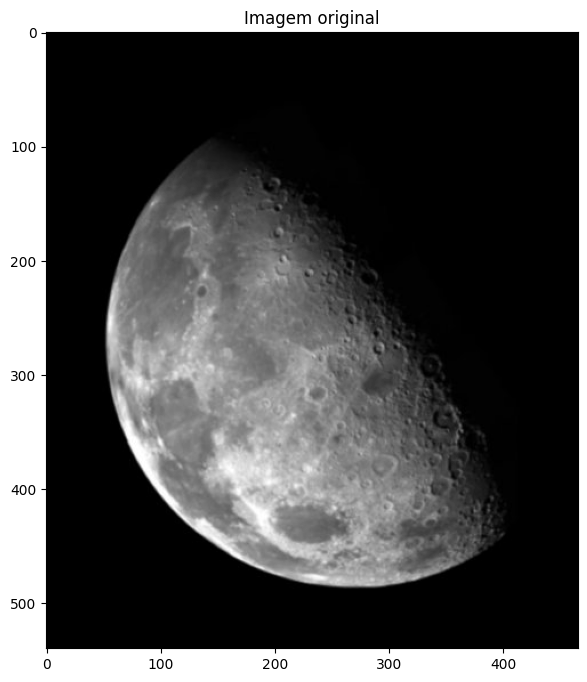

In [46]:
plt.figure(figsize=(10,8))
plt.imshow(image, 'gray')
plt.title('Imagem original')

## Imagens 3.38(b) e 3.38(c)

Text(0.5, 1.0, 'Laplaciano com ajuste')

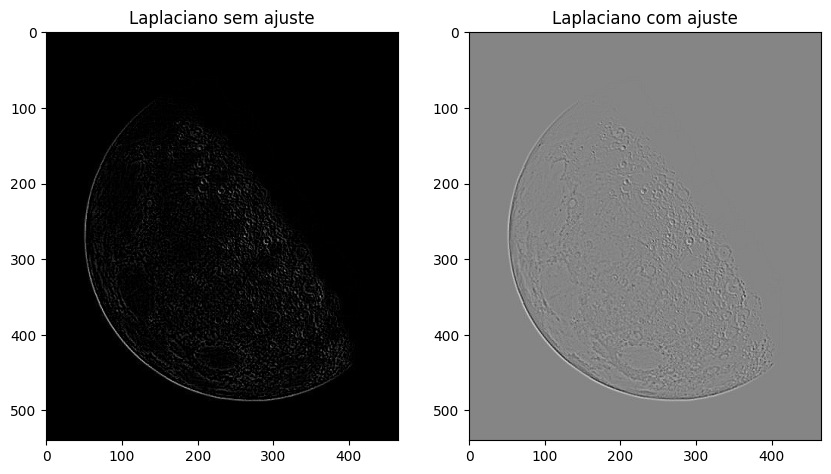

In [47]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(laplacian_sem_ajuste, 'gray')
plt.title('Laplaciano sem ajuste')

plt.subplot(1, 2, 2)
plt.imshow(image_with_laplacian_1, 'gray')
plt.title('Laplaciano com ajuste')


## Gerando as imagens 3.38(d) e 3.38(e)

Text(0.5, 1.0, 'Kernel 2')

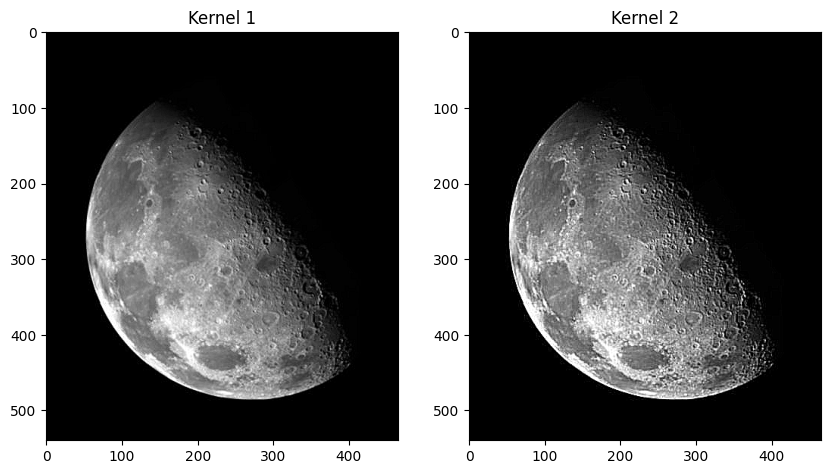

In [40]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(imagem_corrigida_1, 'gray')
plt.title('Kernel 1')

plt.subplot(1, 2, 2)
plt.imshow(imagem_corrigida_2, 'gray')
plt.title('Kernel 2')


## Bonus: Gerando imagens aguçadas com Laplaciano SEM ajuste

Text(0.5, 1.0, 'Kernel 2 (Sem ajuste)')

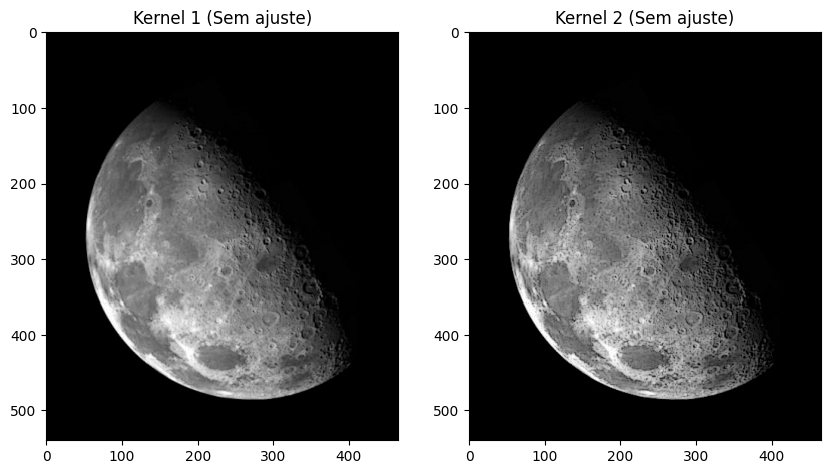

In [50]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
plt.imshow(imagem_corrigida_sem_ajuste_1, 'gray')
plt.title('Kernel 1 (Sem ajuste)')

plt.subplot(1, 2, 2)
plt.imshow(imagem_corrigida_sem_ajuste_2, 'gray')
plt.title('Kernel 2 (Sem ajuste)')
